In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [14, 7]

In [3]:
import os

df = pd.read_csv('datasets/wine/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

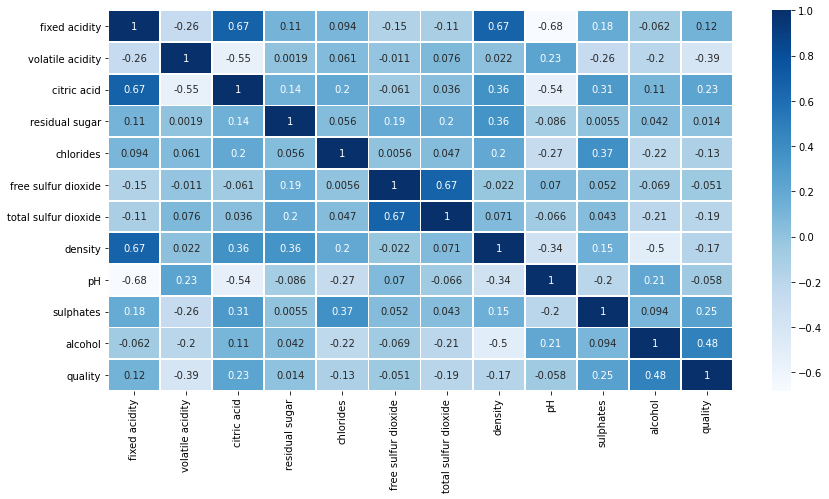

In [6]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='Blues', annot=True, linewidth=0.8)
plt.show();

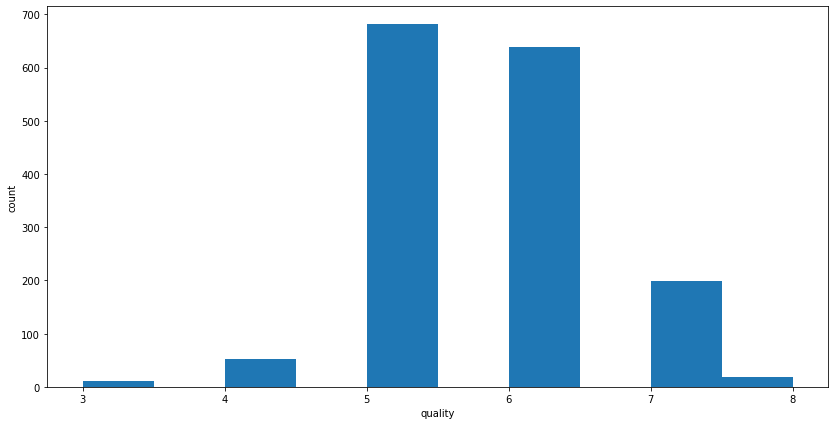

In [7]:
plt.xlabel('quality')
plt.ylabel('count')
df['quality'].hist(grid=False);

In [8]:
draft = df.copy()

In [9]:
draft.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
draft = draft.drop(['residual sugar', 'free sulfur dioxide', 'pH', 'fixed acidity', 'citric acid'], axis=1)

In [11]:
X = draft.drop('quality', axis=1)
y = draft['quality']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
s = sum(y_train.value_counts())
for a in y_train.value_counts():
    print('%.2f' % (a/s))

0.43
0.40
0.12
0.03
0.01
0.01


In [14]:
s = sum(y_test.value_counts())
for a in y_test.value_counts():
    print('%.2f' % (a/s))

0.42
0.40
0.12
0.03
0.01
0.01


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.84038456, -0.48927942, -0.27851741, -1.08849143, -0.58149257,
         0.30561112],
       [ 0.57378326,  2.86620683,  2.03228549,  0.61290593, -0.58149257,
        -0.86781667],
       [ 0.23602292, -0.13607034, -0.45857998,  2.0874503 ,  0.65244695,
         0.258674  ],
       ...,
       [-0.55208456, -0.17531579,  0.32169113,  0.35904664, -0.13278729,
        -0.11682289],
       [-0.15803082,  0.21713874, -0.90873639,  1.54732416, -0.24496361,
         0.72804512],
       [-0.60837795, -0.3322976 ,  0.35170156, -0.30530852,  0.59635879,
         1.4790389 ]])

In [16]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.45277882,  0.21713874, -0.60863211, -0.68879808,  0.14765351,
         0.72804512],
       [ 0.85525022, -0.0379567 , -0.57862169,  1.11522324, -0.35713993,
        -0.21069711],
       [ 1.98111804,  0.17789329,  0.59178498,  0.03497095,  0.09156535,
        -0.586194  ],
       ...,
       [-0.66467134, -0.17531579,  0.23165985,  1.81738723,  1.21332855,
         0.54029667],
       [ 0.40490309, -0.64626123, -1.20884066, -2.09312606, -1.64716761,
         2.41778112],
       [ 0.57378326,  0.19751601,  2.1523272 ,  0.68312233, -0.80584521,
        -1.05556511]])

# Models

In [17]:
from sklearn.linear_model import LogisticRegression

lr_reg = LogisticRegression()
lr_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
lr_reg.score(X_test_scaled, y_test)

0.578125

In [19]:
from sklearn.linear_model import SGDClassifier

sgdclf = SGDClassifier()
sgdclf.fit(X_train_scaled, y_train)

SGDClassifier()

In [20]:
sgdclf.score(X_test_scaled, y_test)

0.54375

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

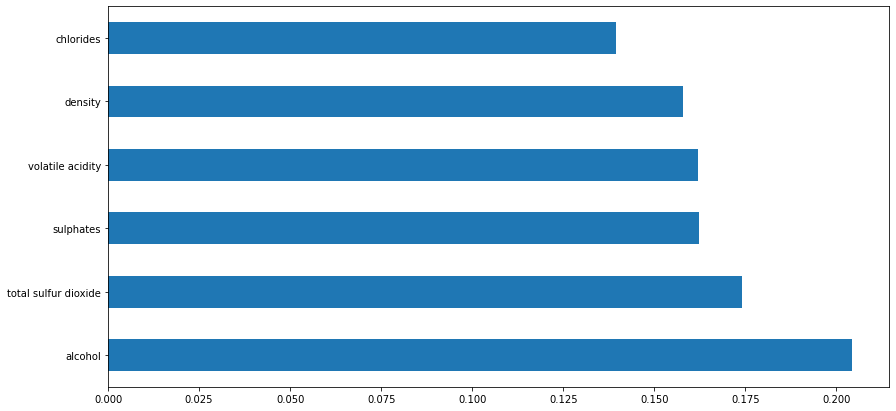

In [22]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
rf.score(X_test_scaled, y_test)

0.66875

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [25]:
svc.score(X_test_scaled, y_test)

0.6125

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [27]:
gnb.score(X_test_scaled, y_test)

0.5875

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

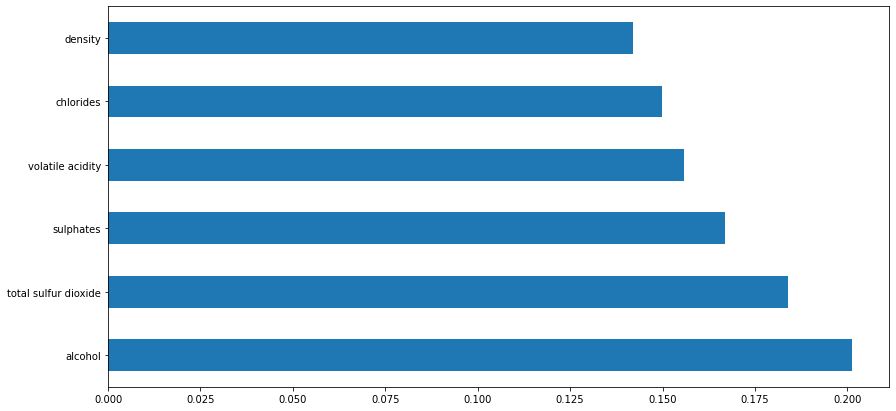

In [29]:
feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
dtc.score(X_test_scaled, y_test)

0.5875

# Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Stochastic Gradient Descent Classifier': SGDClassifier(random_state=42),
    'Gaussian Naive Bayes Classifier': GaussianNB()
}

In [33]:
cv_score_previous = 0
for k in models:
    model = models[k]
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    print(f'{k} score: {cv_score}')
    if cv_score > cv_score_previous:
        cv_score_previous = cv_score
        best_model = k
print()
print('best performance with CV is given by {}'.format(best_model))

Logistic Regression score: 0.598094362745098
Decision Tree Classifier score: 0.5879718137254902
Random Forest Classifier score: 0.6841084558823529
Support Vector Classifier score: 0.6153063725490197
Stochastic Gradient Descent Classifier score: 0.5410110294117647
Gaussian Naive Bayes Classifier score: 0.5613511029411764

best performance with CV is given by Random Forest Classifier


# hyperparameters tuning

In [34]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=1)

n_estimators = [100, 300]
max_depth = [15, 20, 30]
min_samples_split = [5, 7]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [35]:
bestF.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [36]:
best_model = bestF.best_estimator_
best_model

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=1)

In [37]:
best_model.score(X_test_scaled, y_test)

0.684375

tuning hyperapameters helped slightly increase the accuracy, but the accuracy is still not enough.

Next step will be oversampling since the labels are too imbalanced

# oversampling

In [39]:
from imblearn.over_sampling import SMOTE

In [42]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [44]:
oversample = SMOTE(sampling_strategy = {3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000})

X_ov, y_ov = oversample.fit_resample(X, y)

In [48]:
from collections import Counter

counter = Counter(y_ov)
counter

Counter({5: 5000, 6: 5000, 7: 5000, 4: 5000, 8: 5000, 3: 5000})

In [50]:
counter_old = Counter(y)
counter_old

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

we can see that now there is a balance between quality categories, compared to previously

In [57]:
X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ov, y_ov, test_size=0.2, random_state=1)

In [58]:
new_scaler = StandardScaler()
X_train_ov_scaled = new_scaler.fit_transform(X_train_ov)
X_train_ov_scaled

array([[ 0.88407776, -1.01275688,  1.82569381, -2.51996911,  1.05034191,
         2.07010499],
       [ 2.14766762,  1.67458639, -0.62447766, -1.3289471 , -0.83474613,
        -0.8308979 ],
       [ 0.68809759,  0.11264095,  0.93841682, -0.12033595,  0.96545226,
        -0.88357252],
       ...,
       [ 0.40471233,  0.22439936,  2.33065114,  0.23062202, -0.13680828,
        -0.97340895],
       [ 0.21191445,  0.17252253,  0.04955436,  0.11144361, -0.52790853,
        -1.47990383],
       [ 1.11947136, -1.00191535,  1.80792566, -2.35170209,  1.04219446,
         1.9073316 ]])

In [59]:
X_test_ov_scaled = new_scaler.transform(X_test_ov)
X_test_ov_scaled

array([[ 0.05625536, -0.42966957,  0.36528402,  1.42027313, -0.66641682,
        -0.97069099],
       [ 0.07141019, -0.03280353,  1.82090269,  0.77341899,  0.33561955,
        -0.41882224],
       [-0.84273763, -0.75581584, -0.27122488, -1.02529081,  0.6592628 ,
         0.50777322],
       ...,
       [-0.62364567, -0.06953428,  0.16302938,  2.13538019, -0.03945654,
        -0.8164745 ],
       [-0.44172032, -0.28765184,  0.47726   ,  2.09775015,  0.74969382,
        -1.07296664],
       [-0.70145387, -0.08568232,  0.21723141,  0.79005123, -0.13334592,
        -1.41867119]])

In [60]:
cv_score_previous = 0
for k in models:
    model = models[k]
    cv_score = cross_val_score(model, X_train_ov_scaled, y_train_ov, cv=5).mean()
    print(f'{k} score: {cv_score}')
    if cv_score > cv_score_previous:
        cv_score_previous = cv_score
        best_model = k
print()
print('best performance with CV is given by {}'.format(best_model))

Logistic Regression score: 0.558375
Decision Tree Classifier score: 0.919875
Random Forest Classifier score: 0.9645833333333333
Support Vector Classifier score: 0.7584583333333332
Stochastic Gradient Descent Classifier score: 0.47770833333333335
Gaussian Naive Bayes Classifier score: 0.5386666666666666

best performance with CV is given by Random Forest Classifier


# making predictions on test data

In [61]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5,n_estimators=300, random_state=11)
rf.fit(X_train_ov_scaled, y_train_ov)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=11)

In [62]:
from sklearn.metrics import accuracy_score

final_pred = rf.predict(X_test_ov_scaled)
accuracy = accuracy_score(y_test_ov, final_pred)
accuracy

0.9695